In [3]:
import geopandas as gpd
import cobra.postgres.interface as pgi
import cobra.utils.filehandling as fh
import cobra.utils.jobhandling as jh
import geopandas as gpd
import cobra.utils.geodatahandling as gdh

In [4]:
#download_file = 'https://download.geofabrik.de/europe/switzerland-latest.osm.pbf'
#country = 'Swiss'
#download_file = 'https://download.geofabrik.de/europe/great-britain-latest.osm.pbf'
#country = 'gb'
download_file = 'https://download.geofabrik.de/europe/portugal-latest.osm.pbf'
country = 'portugal'
#download_file = 'https://download.geofabrik.de/europe/france-latest.osm.pbf'
#country = 'france'

In [5]:
fileman = fh.Filemanager()
jobman = jh.Jobmanager()

In [ ]:
#jobman.delete_jobs()

In [5]:
fileman.download_plain_file(download_file, country)

In [6]:
datasets = fileman.get_data(datatype='OSM PBF')
dataset = datasets[datasets['Dataset'] == country].iloc[0]

In [7]:
dataset

Type                         OSM PBF
Dataset                     portugal
File         portugal-latest.osm.pbf
Path              /download/portugal
Size (MB)                     250.92
Name: 45, dtype: object

In [8]:
jobman.create_import_job_from_dataset(dataset, f'{country}power', style='power.style')

create_import_job_from_dataset
OSM PBF


In [13]:
jobman.get_jobs(df=True)

,UUID,Name,Job Type,Date created,Date started,Date finished,Priority,Status
0,a3b4e02f-973d-4454-a50d-cf8b32c0f367,Load OSM from portugal,osm2pg,"Fri, 18 Feb 2022 15:18:46 GMT",None,None,42,Failed
1,76fb0bf2-062d-4038-aa56-47d9b8174d86,Load OSM from portugal,osm2pg,"Fri, 18 Feb 2022 15:35:03 GMT",None,"Fri, 18 Feb 2022 15:38:41 GMT",42,Finished
2,83addbf4-750e-4a4a-8001-afec90dd0a6c,Export PG,pg2x,"Fri, 18 Feb 2022 15:42:28 GMT",None,None,42,Failed
3,bacc0e7a-44c7-442f-8bee-c1eb1564d4be,Export PG,pg2x,"Fri, 18 Feb 2022 15:49:21 GMT",None,None,42,Failed
4,dd91a23c-9b5a-4b36-93eb-e7330e32d442,Export PG,pg2x,"Fri, 18 Feb 2022 15:51:43 GMT",None,None,42,Failed
5,ce65544c-844a-44da-9952-76373958e9d6,Export PG,pg2x,"Fri, 18 Feb 2022 16:30:50 GMT",None,"Fri, 18 Feb 2022 16:31:00 GMT",42,Finished
6,0794e113-061f-416c-8020-ebb450b9124b,Export PG,pg2x,"Fri, 18 Feb 2022 16:32:55 GMT",None,"Fri, 18 Feb 2022 16:33:02 GMT",42,Finished
7,543a479a-9fac-4a2a-a2b6-b18c8180a57a,Load OSM from france,osm2pg,"Fri, 18 Feb 2022 16:48:10 GMT",None,"Fri, 18 Feb 2022 19:30:37 GMT",42,Finished
8,522d68b9-28bb-453f-a1b6-eadce430c5d0,Export PG,pg2x,"Fri, 18 Feb 2022 19:33:06 GMT",None,"Fri, 18 Feb 2022 19:33:16 GMT",42,Finished
9,f7bc9fd5-a690-4fd0-8aad-be28aea820d7,Load OSM from portugal,osm2pg,"Fri, 18 Feb 2022 21:14:44 GMT",None,"Fri, 18 Feb 2022 21:18:31 GMT",42,Finished


In [14]:
sql = f"SELECT osm.way AS geom, osm.* FROM {country}power.planet_osm_line osm WHERE power IS NOT NULL"
pg_interface = pgi.PgInterface()
conn = pg_interface.get_connection()
powerlines = gpd.GeoDataFrame.from_postgis(sql, conn)

<AxesSubplot:>

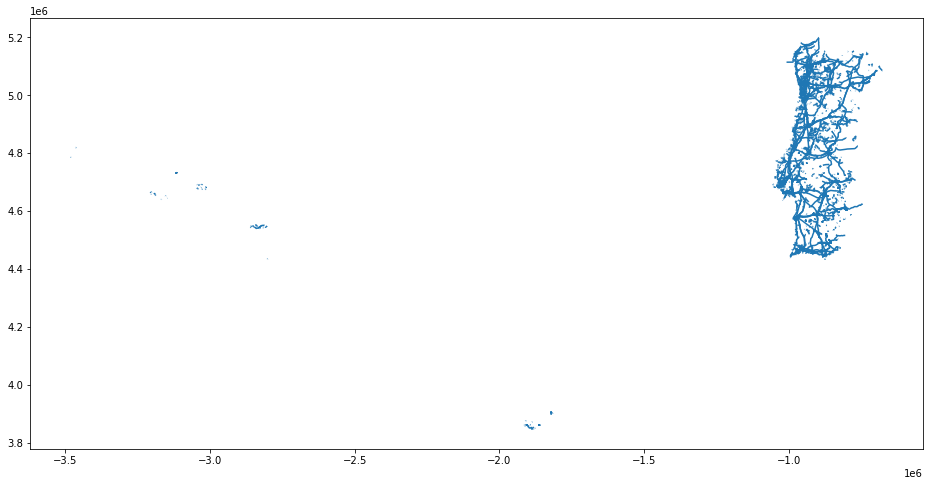

In [15]:
powerlines.plot(figsize=(16,16))

In [15]:
sql = f"SELECT osm.way AS geom, osm.* FROM {country}power.planet_osm_line osm WHERE power IS NOT NULL AND (power = 'line')"
jobman.create_new_pg_to_x(sql=sql, format='GPKG', filename=f'{country}_powerline.gpkg')

In [17]:
jobman.get_jobs(df=True)

,UUID,Name,Job Type,Date created,Date started,Date finished,Priority,Status
0,a3b4e02f-973d-4454-a50d-cf8b32c0f367,Load OSM from portugal,osm2pg,"Fri, 18 Feb 2022 15:18:46 GMT",None,None,42,Failed
1,76fb0bf2-062d-4038-aa56-47d9b8174d86,Load OSM from portugal,osm2pg,"Fri, 18 Feb 2022 15:35:03 GMT",None,"Fri, 18 Feb 2022 15:38:41 GMT",42,Finished
2,83addbf4-750e-4a4a-8001-afec90dd0a6c,Export PG,pg2x,"Fri, 18 Feb 2022 15:42:28 GMT",None,None,42,Failed
3,bacc0e7a-44c7-442f-8bee-c1eb1564d4be,Export PG,pg2x,"Fri, 18 Feb 2022 15:49:21 GMT",None,None,42,Failed
4,dd91a23c-9b5a-4b36-93eb-e7330e32d442,Export PG,pg2x,"Fri, 18 Feb 2022 15:51:43 GMT",None,None,42,Failed
5,ce65544c-844a-44da-9952-76373958e9d6,Export PG,pg2x,"Fri, 18 Feb 2022 16:30:50 GMT",None,"Fri, 18 Feb 2022 16:31:00 GMT",42,Finished
6,0794e113-061f-416c-8020-ebb450b9124b,Export PG,pg2x,"Fri, 18 Feb 2022 16:32:55 GMT",None,"Fri, 18 Feb 2022 16:33:02 GMT",42,Finished
7,543a479a-9fac-4a2a-a2b6-b18c8180a57a,Load OSM from france,osm2pg,"Fri, 18 Feb 2022 16:48:10 GMT",None,"Fri, 18 Feb 2022 19:30:37 GMT",42,Finished
8,522d68b9-28bb-453f-a1b6-eadce430c5d0,Export PG,pg2x,"Fri, 18 Feb 2022 19:33:06 GMT",None,"Fri, 18 Feb 2022 19:33:16 GMT",42,Finished


In [18]:
sql = f"SELECT osm.way AS geom, osm.* FROM {country}power.planet_osm_point osm WHERE power IS NOT NULL"
pg_interface = pgi.PgInterface()
conn = pg_interface.get_connection()
powerpoints = gpd.GeoDataFrame.from_postgis(sql, conn)

<AxesSubplot:>

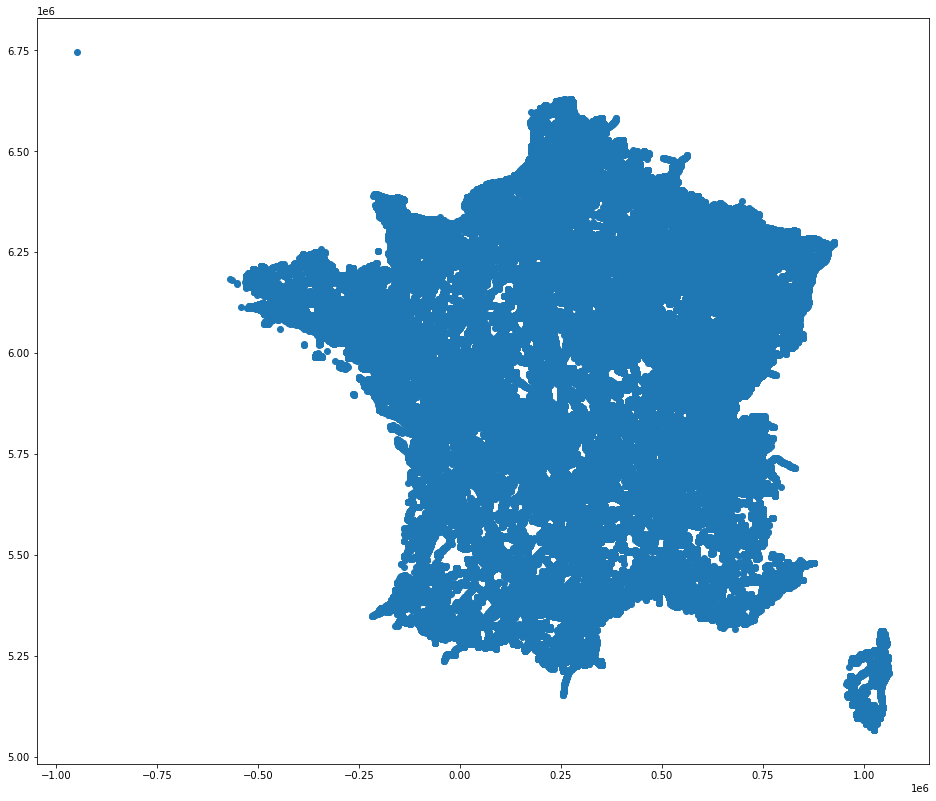

In [19]:
powerpoints.plot(figsize=(16, 16))

In [ ]:
sql = f"SELECT osm.way AS geom, osm.* FROM {country}power.planet_osm_point osm WHERE power IS NOT NULL"
jobman.create_new_pg_to_x(sql=sql, format='GPKG', filename=f'{country}_powerpoint.gpkg')

In [ ]:
jobman.get_jobs(df=True)